### Multilayer perceptron

In [1]:
import tensorflow as tf
print(tf.version.VERSION)

2.2.0


In [2]:
import pandas as pd


In [3]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [4]:
#import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Read the dataset
data = pd.read_csv("./data_all_dfeatures.csv")

In [6]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140842, 130), (19868, 130), (140842,), (19868,))

In [8]:
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random as rn
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import datetime

In [9]:
tf.__version__

'2.2.0'

In [10]:
num_classes = 2

In [11]:
from tensorflow.keras.layers import PReLU

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model4():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(130,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [13]:
model4 = create_model4()
model4.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                8384      
_________________________________________________________________
p_re_lu (PReLU)              (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [14]:
model4.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test),
           batch_size=16)

Epoch 1/20
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1023 - accuracy: 0.8710 - val_loss: 0.1120 - val_accuracy: 0.8735
Epoch 2/20
8803/8803 [==============================] - 23s 3ms/step - loss: 0.0917 - accuracy: 0.8865 - val_loss: 0.1421 - val_accuracy: 0.8229
Epoch 3/20
8803/8803 [==============================] - 23s 3ms/step - loss: 0.0893 - accuracy: 0.8885 - val_loss: 0.1202 - val_accuracy: 0.8694
Epoch 4/20
8803/8803 [==============================] - 23s 3ms/step - loss: 0.0881 - accuracy: 0.8903 - val_loss: 0.1308 - val_accuracy: 0.8475
Epoch 5/20
8803/8803 [==============================] - 23s 3ms/step - loss: 0.0874 - accuracy: 0.8909 - val_loss: 0.1603 - val_accuracy: 0.7872
Epoch 6/20
8803/8803 [==============================] - 23s 3ms/step - loss: 0.0876 - accuracy: 0.8912 - val_loss: 0.1253 - val_accuracy: 0.8468
Epoch 7/20
8803/8803 [==============================] - 23s 3ms/step - loss: 0.0874 - accuracy: 0.8920 - val_loss: 0.1553 - val_ac

In [15]:
model4.save('./mlp_all_dfeatures')

W0517 02:58:41.274467 139875086333760 deprecation.py:506] From /mnt/disks/user/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
loss = model4.history.history['loss']
val_loss = model4.history.history['val_loss']
accuracy = model4.history.history['accuracy']
val_accuracy = model4.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.1022699698805809,
  0.09166811406612396,
  0.0892762765288353,
  0.08808758854866028,
  0.0873650312423706,
  0.08756842464208603,
  0.08744010329246521,
  0.08647957444190979,
  0.08711811155080795,
  0.08683557063341141,
  0.0861312597990036,
  0.08579044044017792,
  0.08574939519166946,
  0.08574637770652771,
  0.08615417033433914,
  0.0857505053281784,
  0.0854836031794548,
  0.0853862389922142,
  0.08587103337049484,
  0.08566315472126007],
 [0.11202507466077805,
  0.1420896351337433,
  0.12015385180711746,
  0.13077563047409058,
  0.16028910875320435,
  0.12529867887496948,
  0.15533097088336945,
  0.13754414021968842,
  0.12887148559093475,
  0.11862584948539734,
  0.12579737603664398,
  0.1344955414533615,
  0.13343966007232666,
  0.12302030622959137,
  0.11514726281166077,
  0.12346351891756058,
  0.11877242475748062,
  0.11406053602695465,
  0.11480893194675446,
  0.13441072404384613],
 [0.870954692363739,
  0.8864756226539612,
  0.8884778618812561,
  0.8903452157974243,


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [18]:

# predict probabilities for test set
yhat_probs = model4.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model4.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

W0517 02:58:47.057821 139875086333760 deprecation.py:323] From <ipython-input-18-cf1722a40f82>:5: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Accuracy: 0.837880
Precision: 0.165035
Recall: 0.104286
F1 score: 0.127809
ROC AUC: 0.581376
[[16411  1194]
 [ 2027   236]]


In [19]:
from matplotlib import pyplot

Train: 0.898, Test: 0.838


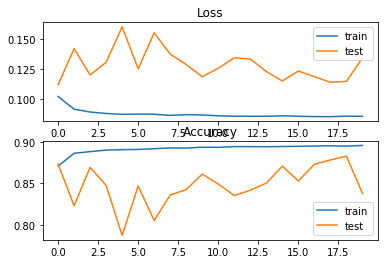

In [20]:
# evaluate the model
_, train_acc = model4.evaluate(X_train, y_train, verbose=0)
_, test_acc = model4.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [13]:
# epochs = 200, learning_rate=0.01, dropout=0.15
model5 = create_model4()
model5.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                8384      
_________________________________________________________________
p_re_lu (PReLU)              (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [14]:
model5.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test),
           batch_size=16)

Epoch 1/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.1038 - accuracy: 0.8692 - val_loss: 0.1296 - val_accuracy: 0.8362
Epoch 2/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0910 - accuracy: 0.8858 - val_loss: 0.1128 - val_accuracy: 0.8698
Epoch 3/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0895 - accuracy: 0.8877 - val_loss: 0.1071 - val_accuracy: 0.8781
Epoch 4/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0886 - accuracy: 0.8897 - val_loss: 0.1149 - val_accuracy: 0.8663
Epoch 5/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0875 - accuracy: 0.8915 - val_loss: 0.1167 - val_accuracy: 0.8601
Epoch 6/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0866 - accuracy: 0.8928 - val_loss: 0.1422 - val_accuracy: 0.8215
Epoch 7/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0867 - accuracy: 0.8928 - val_loss: 0.1190 -

Epoch 57/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0847 - accuracy: 0.8978 - val_loss: 0.1507 - val_accuracy: 0.8337
Epoch 58/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.0844 - accuracy: 0.8981 - val_loss: 0.1117 - val_accuracy: 0.8818
Epoch 59/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.0850 - accuracy: 0.8978 - val_loss: 0.1470 - val_accuracy: 0.8088
Epoch 60/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0853 - accuracy: 0.8978 - val_loss: 0.1308 - val_accuracy: 0.8501
Epoch 61/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.0850 - accuracy: 0.8978 - val_loss: 0.1233 - val_accuracy: 0.8517
Epoch 62/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.0849 - accuracy: 0.8982 - val_loss: 0.1192 - val_accuracy: 0.8702
Epoch 63/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.0847 - accuracy: 0.8985 - val_loss: 0

8803/8803 [==============================] - 25s 3ms/step - loss: 0.1684 - accuracy: 0.8316 - val_loss: 0.2621 - val_accuracy: 0.7379
Epoch 168/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.1641 - accuracy: 0.8359 - val_loss: 0.1472 - val_accuracy: 0.8528
Epoch 169/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.2335 - accuracy: 0.7665 - val_loss: 0.1904 - val_accuracy: 0.8096
Epoch 170/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1660 - accuracy: 0.8340 - val_loss: 0.4060 - val_accuracy: 0.5940
Epoch 173/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1863 - accuracy: 0.8137 - val_loss: 0.1795 - val_accuracy: 0.8205
Epoch 174/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1537 - accuracy: 0.8463 - val_loss: 0.1407 - val_accuracy: 0.8593
Epoch 175/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1500 - accuracy: 0.8500 - val_loss: 0.2528 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8803/8803 [==============================] - 25s 3ms/step - loss: 0.1510 - accuracy: 0.8490 - val_loss: 0.6225 - val_accuracy: 0.3775
Epoch 182/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.2287 - accuracy: 0.7713 - val_loss: 0.1809 - val_accuracy: 0.8191
Epoch 183/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.1558 - accuracy: 0.8442 - val_loss: 0.1328 - val_accuracy: 0.8672
Epoch 184/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1384 - accuracy: 0.8616 - val_loss: 0.1572 - val_accuracy: 0.8428
Epoch 185/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1459 - accuracy: 0.8541 - val_loss: 0.1974 - val_accuracy: 0.8025
Epoch 186/200
8803/8803 [==============================] - 25s 3ms/step - loss: 0.1730 - accuracy: 0.8269 - val_loss: 0.1580 - val_accuracy: 0.8420
Epoch 187/200
8803/8803 [==============================] - 24s 3ms/step - loss: 0.1555 - accuracy: 0.8445 - val_loss: 0.1559 -

In [15]:
loss = model5.history.history['loss']
val_loss = model5.history.history['val_loss']
accuracy = model5.history.history['accuracy']
val_accuracy = model5.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.10383662581443787,
  0.09103304892778397,
  0.0895344689488411,
  0.08858262747526169,
  0.08749130368232727,
  0.08659904450178146,
  0.08673649281263351,
  0.08658073842525482,
  0.08603665977716446,
  0.0859794095158577,
  0.08616945892572403,
  0.08642727136611938,
  0.08623184263706207,
  0.08558939397335052,
  0.08558539301156998,
  0.08621037751436234,
  0.0859493836760521,
  0.08607013523578644,
  0.08526524901390076,
  0.08505034446716309,
  0.08521881699562073,
  0.08476610481739044,
  0.08492746949195862,
  0.08570737391710281,
  0.08485768735408783,
  0.08529064804315567,
  0.08492104709148407,
  0.0857926532626152,
  0.0850340947508812,
  0.08524530380964279,
  0.08567170798778534,
  0.08475092053413391,
  0.08570634573698044,
  0.08511339128017426,
  0.08540429174900055,
  0.08494489639997482,
  0.08508414030075073,
  0.08574282377958298,
  0.08558262884616852,
  0.08429334312677383,
  0.08495087921619415,
  0.08450550585985184,
  0.0847388282418251,
  0.0848943740129

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# predict probabilities for test set
yhat_probs = model5.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model5.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

W0516 09:39:02.411173 140057343551296 deprecation.py:323] From <ipython-input-16-4d93b27d8f64>:13: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Accuracy: 0.876585
Precision: 0.188119
Recall: 0.025188
F1 score: 0.044427
ROC AUC: 0.505580
[[17359   246]
 [ 2206    57]]


Train: 0.850, Test: 0.877


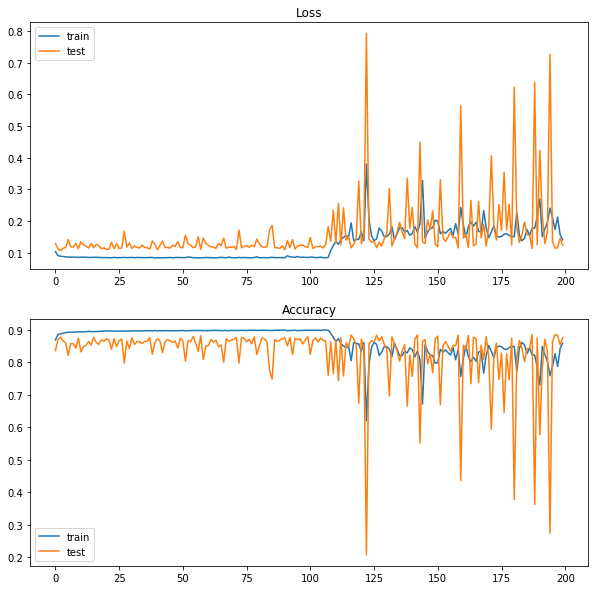

In [18]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = model5.evaluate(X_train, y_train, verbose=0)
_, test_acc = model5.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(10, 10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [35]:
# epochs = 100, learning_rate=0.01, dropout=0.15, batch_size=64
model6 = create_model4()
model6.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                8384      
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [36]:
model6.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test),
           batch_size=64)

Epoch 1/100
2201/2201 [==============================] - 6s 3ms/step - loss: 0.1017 - accuracy: 0.8714 - val_loss: 0.1265 - val_accuracy: 0.8404
Epoch 2/100
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0877 - accuracy: 0.8891 - val_loss: 0.1134 - val_accuracy: 0.8715
Epoch 3/100
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0867 - accuracy: 0.8899 - val_loss: 0.1102 - val_accuracy: 0.8717
Epoch 4/100
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0848 - accuracy: 0.8931 - val_loss: 0.1200 - val_accuracy: 0.8560
Epoch 5/100
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0844 - accuracy: 0.8941 - val_loss: 0.1227 - val_accuracy: 0.8495
Epoch 6/100
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.8948 - val_loss: 0.1124 - val_accuracy: 0.8687
Epoch 7/100
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0835 - accuracy: 0.8950 - val_loss: 0.1195 - val_ac

In [37]:
loss = model6.history.history['loss']
val_loss = model6.history.history['val_loss']
accuracy = model6.history.history['accuracy']
val_accuracy = model6.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.1017032116651535,
  0.08770932257175446,
  0.08670404553413391,
  0.0848219245672226,
  0.0843556746840477,
  0.0834493339061737,
  0.08349746465682983,
  0.0825815498828888,
  0.08240503817796707,
  0.08245813846588135,
  0.08199086785316467,
  0.08169180899858475,
  0.08140886574983597,
  0.08103863894939423,
  0.08090080320835114,
  0.08082986623048782,
  0.08100995421409607,
  0.08039931207895279,
  0.08087296038866043,
  0.08047842234373093,
  0.08053416013717651,
  0.08044798672199249,
  0.07987071573734283,
  0.07997192442417145,
  0.0798896849155426,
  0.07970290631055832,
  0.07969014346599579,
  0.07983018457889557,
  0.0797090083360672,
  0.07968376576900482,
  0.0791703388094902,
  0.07935038954019547,
  0.07930836826562881,
  0.07946562767028809,
  0.0793653354048729,
  0.07924898713827133,
  0.07894390821456909,
  0.0788404643535614,
  0.07902086526155472,
  0.07902459055185318,
  0.07898948341608047,
  0.0785410925745964,
  0.0786953940987587,
  0.07839202880859375,


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# predict probabilities for test set
yhat_probs = model6.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model6.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.862039
Precision: 0.218824
Recall: 0.082192
F1 score: 0.119499
ROC AUC: 0.609017
[[16941   664]
 [ 2077   186]]


Train: 0.909, Test: 0.862


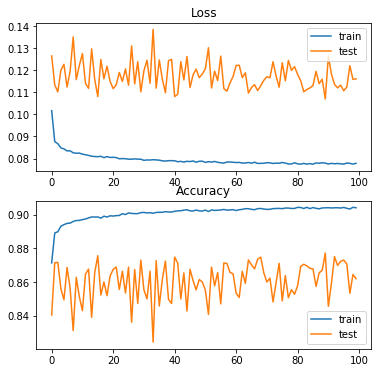

In [39]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = model6.evaluate(X_train, y_train, verbose=0)
_, test_acc = model6.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(6, 6))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [27]:
# epochs = 300, learning_rate=0.01, dropout=0.15, batch_size=64
model7 = create_model4()
model7.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                8384      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [28]:
model7.fit(X_train, y_train, epochs=300, validation_data=(X_test,y_test),
           batch_size=64)

Epoch 1/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.1010 - accuracy: 0.8724 - val_loss: 0.1295 - val_accuracy: 0.8358
Epoch 2/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.8899 - val_loss: 0.1101 - val_accuracy: 0.8736
Epoch 3/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.8909 - val_loss: 0.1188 - val_accuracy: 0.8542
Epoch 4/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0851 - accuracy: 0.8929 - val_loss: 0.1122 - val_accuracy: 0.8691
Epoch 5/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0837 - accuracy: 0.8947 - val_loss: 0.1330 - val_accuracy: 0.8321
Epoch 6/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0827 - accuracy: 0.8956 - val_loss: 0.1129 - val_accuracy: 0.8701
Epoch 7/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.8960 - val_loss: 0.1061 - val_ac

2201/2201 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9058 - val_loss: 0.1217 - val_accuracy: 0.8554
Epoch 114/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0769 - accuracy: 0.9061 - val_loss: 0.1308 - val_accuracy: 0.8419
Epoch 115/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9064 - val_loss: 0.1314 - val_accuracy: 0.8387
Epoch 116/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9057 - val_loss: 0.1143 - val_accuracy: 0.8684
Epoch 117/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9062 - val_loss: 0.1136 - val_accuracy: 0.8666
Epoch 118/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9061 - val_loss: 0.1220 - val_accuracy: 0.8560
Epoch 119/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0767 - accuracy: 0.9056 - val_loss: 0.1218 - val_ac

Epoch 169/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0762 - accuracy: 0.9066 - val_loss: 0.1239 - val_accuracy: 0.8511
Epoch 170/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9065 - val_loss: 0.1147 - val_accuracy: 0.8656
Epoch 171/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9064 - val_loss: 0.1337 - val_accuracy: 0.8410
Epoch 172/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9066 - val_loss: 0.1138 - val_accuracy: 0.8670
Epoch 173/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0760 - accuracy: 0.9068 - val_loss: 0.1134 - val_accuracy: 0.8725
Epoch 174/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.9066 - val_loss: 0.1235 - val_accuracy: 0.8526
Epoch 175/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9066 - val_loss: 0

Epoch 225/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0762 - accuracy: 0.9068 - val_loss: 0.1198 - val_accuracy: 0.8583
Epoch 226/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.9078 - val_loss: 0.1237 - val_accuracy: 0.8560
Epoch 227/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9066 - val_loss: 0.1124 - val_accuracy: 0.8699
Epoch 228/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9065 - val_loss: 0.1227 - val_accuracy: 0.8547
Epoch 229/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.9070 - val_loss: 0.1206 - val_accuracy: 0.8576
Epoch 230/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9068 - val_loss: 0.1154 - val_accuracy: 0.8690
Epoch 231/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0759 - accuracy: 0.9071 - val_loss: 0

Epoch 281/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0758 - accuracy: 0.9078 - val_loss: 0.1280 - val_accuracy: 0.8506
Epoch 282/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9069 - val_loss: 0.1123 - val_accuracy: 0.8692
Epoch 283/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0759 - accuracy: 0.9069 - val_loss: 0.1171 - val_accuracy: 0.8622
Epoch 284/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.9071 - val_loss: 0.1186 - val_accuracy: 0.8593
Epoch 285/300
2201/2201 [==============================] - 7s 3ms/step - loss: 0.0760 - accuracy: 0.9074 - val_loss: 0.1140 - val_accuracy: 0.8687
Epoch 286/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9072 - val_loss: 0.1256 - val_accuracy: 0.8562
Epoch 287/300
2201/2201 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9072 - val_loss: 0

In [29]:
loss = model7.history.history['loss']
val_loss = model7.history.history['val_loss']
accuracy = model7.history.history['accuracy']
val_accuracy = model7.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.10101200640201569,
  0.08743134140968323,
  0.0864764153957367,
  0.08506747335195541,
  0.08370473980903625,
  0.08268248289823532,
  0.08262689411640167,
  0.08282234519720078,
  0.08211048692464828,
  0.08154930174350739,
  0.08171779662370682,
  0.08097013086080551,
  0.08089498430490494,
  0.08102294057607651,
  0.08081979304552078,
  0.0808681920170784,
  0.08074098080396652,
  0.08001729100942612,
  0.07944658398628235,
  0.08029724657535553,
  0.07989020645618439,
  0.07932497560977936,
  0.07950252294540405,
  0.07945073395967484,
  0.07933736592531204,
  0.07889866828918457,
  0.07905617356300354,
  0.07898440212011337,
  0.07918710261583328,
  0.07908522337675095,
  0.07882839441299438,
  0.07903163135051727,
  0.07852216809988022,
  0.07819302380084991,
  0.07870756089687347,
  0.07855595648288727,
  0.07846096903085709,
  0.0783989429473877,
  0.07841290533542633,
  0.07813560962677002,
  0.07820912450551987,
  0.07800060510635376,
  0.07773920893669128,
  0.0779007747

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# predict probabilities for test set
yhat_probs = model7.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model7.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.866116
Precision: 0.172982
Recall: 0.046399
F1 score: 0.073171
ROC AUC: 0.577584
[[17103   502]
 [ 2158   105]]


Train: 0.910, Test: 0.866


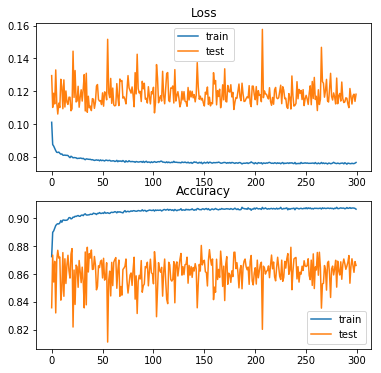

In [31]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = model7.evaluate(X_train, y_train, verbose=0)
_, test_acc = model7.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(6, 6))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [16]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model8():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(130,), name='input_layer'),
        Dense(512, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [13]:
model8 = create_model8()
model8.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 512)               67072     
_________________________________________________________________
p_re_lu (PReLU)              (None, 512)               512       
_________________________________________________________________
drop_out1 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________


In [14]:
model8.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test),
           batch_size=500)

Epoch 1/600
282/282 [==============================] - 1s 4ms/step - loss: 0.2561 - accuracy: 0.7376 - val_loss: 0.1770 - val_accuracy: 0.8146
Epoch 2/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1165 - accuracy: 0.8783 - val_loss: 0.1391 - val_accuracy: 0.8566
Epoch 3/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1101 - accuracy: 0.8847 - val_loss: 0.1434 - val_accuracy: 0.8512
Epoch 4/600
282/282 [==============================] - 1s 3ms/step - loss: 0.1044 - accuracy: 0.8892 - val_loss: 0.1221 - val_accuracy: 0.8749
Epoch 5/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0917 - accuracy: 0.8940 - val_loss: 0.1206 - val_accuracy: 0.8569
Epoch 6/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.8976 - val_loss: 0.1319 - val_accuracy: 0.8331
Epoch 7/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.8986 - val_loss: 0.1164 - val_accuracy: 0.8582

Epoch 58/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9148 - val_loss: 0.1127 - val_accuracy: 0.8670
Epoch 59/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.9147 - val_loss: 0.1110 - val_accuracy: 0.8714
Epoch 60/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9158 - val_loss: 0.1224 - val_accuracy: 0.8503
Epoch 61/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0697 - accuracy: 0.9136 - val_loss: 0.1200 - val_accuracy: 0.8576
Epoch 62/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0682 - accuracy: 0.9153 - val_loss: 0.1156 - val_accuracy: 0.8631
Epoch 63/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0682 - accuracy: 0.9154 - val_loss: 0.1164 - val_accuracy: 0.8641
Epoch 64/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9154 - val_loss: 0.1135 - val_accuracy:

Epoch 115/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9194 - val_loss: 0.1209 - val_accuracy: 0.8575
Epoch 116/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9203 - val_loss: 0.1389 - val_accuracy: 0.8241
Epoch 117/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.9208 - val_loss: 0.1177 - val_accuracy: 0.8619
Epoch 118/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9200 - val_loss: 0.1227 - val_accuracy: 0.8541
Epoch 119/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9216 - val_loss: 0.1230 - val_accuracy: 0.8524
Epoch 120/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9200 - val_loss: 0.1169 - val_accuracy: 0.8631
Epoch 121/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9205 - val_loss: 0.1265 - val_ac

282/282 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.9223 - val_loss: 0.1217 - val_accuracy: 0.8566
Epoch 172/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9216 - val_loss: 0.1210 - val_accuracy: 0.8576
Epoch 173/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0624 - accuracy: 0.9232 - val_loss: 0.1292 - val_accuracy: 0.8459
Epoch 174/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0627 - accuracy: 0.9232 - val_loss: 0.1208 - val_accuracy: 0.8586
Epoch 175/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0624 - accuracy: 0.9234 - val_loss: 0.1195 - val_accuracy: 0.8628
Epoch 176/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0628 - accuracy: 0.9227 - val_loss: 0.1200 - val_accuracy: 0.8601
Epoch 177/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9227 - val_loss: 0.1319 - val_accuracy: 0.8395

282/282 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9251 - val_loss: 0.1204 - val_accuracy: 0.8622
Epoch 228/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9250 - val_loss: 0.1164 - val_accuracy: 0.8694
Epoch 229/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9243 - val_loss: 0.1252 - val_accuracy: 0.8524
Epoch 230/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9246 - val_loss: 0.1289 - val_accuracy: 0.8448
Epoch 231/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0623 - accuracy: 0.9233 - val_loss: 0.1178 - val_accuracy: 0.8685
Epoch 232/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9257 - val_loss: 0.1176 - val_accuracy: 0.8672
Epoch 233/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9243 - val_loss: 0.1187 - val_accuracy: 0.8684

282/282 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9245 - val_loss: 0.1236 - val_accuracy: 0.8545
Epoch 284/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9266 - val_loss: 0.1286 - val_accuracy: 0.8471
Epoch 285/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0609 - accuracy: 0.9253 - val_loss: 0.1423 - val_accuracy: 0.8261
Epoch 286/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9246 - val_loss: 0.1204 - val_accuracy: 0.8616
Epoch 287/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0606 - accuracy: 0.9256 - val_loss: 0.1266 - val_accuracy: 0.8515
Epoch 288/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9253 - val_loss: 0.1240 - val_accuracy: 0.8569
Epoch 289/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9264 - val_loss: 0.1274 - val_accuracy: 0.8495

282/282 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.9273 - val_loss: 0.1185 - val_accuracy: 0.8663
Epoch 340/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0619 - accuracy: 0.9250 - val_loss: 0.1224 - val_accuracy: 0.8628
Epoch 341/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9269 - val_loss: 0.1223 - val_accuracy: 0.8588
Epoch 342/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0.9261 - val_loss: 0.1410 - val_accuracy: 0.8264
Epoch 343/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9263 - val_loss: 0.1209 - val_accuracy: 0.8649
Epoch 344/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0603 - accuracy: 0.9263 - val_loss: 0.1208 - val_accuracy: 0.8631
Epoch 345/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9273 - val_loss: 0.1421 - val_accuracy: 0.8256

282/282 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9270 - val_loss: 0.1204 - val_accuracy: 0.8643
Epoch 396/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9276 - val_loss: 0.1485 - val_accuracy: 0.8133
Epoch 397/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9266 - val_loss: 0.1171 - val_accuracy: 0.8735
Epoch 398/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9280 - val_loss: 0.1256 - val_accuracy: 0.8577
Epoch 399/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9269 - val_loss: 0.1418 - val_accuracy: 0.8234
Epoch 400/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0591 - accuracy: 0.9283 - val_loss: 0.1413 - val_accuracy: 0.8258
Epoch 401/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9284 - val_loss: 0.1213 - val_accuracy: 0.8625

282/282 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9296 - val_loss: 0.1278 - val_accuracy: 0.8516
Epoch 452/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9293 - val_loss: 0.1259 - val_accuracy: 0.8538
Epoch 453/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9290 - val_loss: 0.1308 - val_accuracy: 0.8449
Epoch 454/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9291 - val_loss: 0.1237 - val_accuracy: 0.8616
Epoch 455/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0589 - accuracy: 0.9284 - val_loss: 0.1260 - val_accuracy: 0.8592
Epoch 456/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9285 - val_loss: 0.1198 - val_accuracy: 0.8697
Epoch 457/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9293 - val_loss: 0.1287 - val_accuracy: 0.8482

282/282 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9284 - val_loss: 0.1310 - val_accuracy: 0.8466
Epoch 508/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0592 - accuracy: 0.9286 - val_loss: 0.1296 - val_accuracy: 0.8504
Epoch 509/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9298 - val_loss: 0.1251 - val_accuracy: 0.8559
Epoch 510/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9301 - val_loss: 0.1648 - val_accuracy: 0.7888
Epoch 511/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9286 - val_loss: 0.1210 - val_accuracy: 0.8636
Epoch 512/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0575 - accuracy: 0.9303 - val_loss: 0.1229 - val_accuracy: 0.8642
Epoch 513/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0581 - accuracy: 0.9293 - val_loss: 0.1345 - val_accuracy: 0.8413

282/282 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9300 - val_loss: 0.1215 - val_accuracy: 0.8680
Epoch 564/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0581 - accuracy: 0.9294 - val_loss: 0.1296 - val_accuracy: 0.8515
Epoch 565/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9291 - val_loss: 0.1196 - val_accuracy: 0.8706
Epoch 566/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0575 - accuracy: 0.9310 - val_loss: 0.1314 - val_accuracy: 0.8492
Epoch 567/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9301 - val_loss: 0.1356 - val_accuracy: 0.8409
Epoch 568/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0.9296 - val_loss: 0.1312 - val_accuracy: 0.8467
Epoch 569/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9301 - val_loss: 0.1330 - val_accuracy: 0.8435

In [15]:
model8.save('./mlp_all_dfeatures_model8')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./mlp_all_dfeatures_model8/assets


In [16]:
loss = model8.history.history['loss']
val_loss = model8.history.history['val_loss']
accuracy = model8.history.history['accuracy']
val_accuracy = model8.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.25610241293907166,
  0.11653496325016022,
  0.11007533967494965,
  0.10437051951885223,
  0.09171319007873535,
  0.0828232541680336,
  0.08137942850589752,
  0.08005112409591675,
  0.0791354551911354,
  0.07885274291038513,
  0.07815443724393845,
  0.07782386988401413,
  0.07725951820611954,
  0.07704183459281921,
  0.07684417814016342,
  0.07637418806552887,
  0.07539666444063187,
  0.0749422237277031,
  0.07487858831882477,
  0.07455295324325562,
  0.07410001754760742,
  0.07450097054243088,
  0.0734495222568512,
  0.07347466796636581,
  0.07336396723985672,
  0.07327920943498611,
  0.07321321964263916,
  0.07315214723348618,
  0.07297445833683014,
  0.07232110947370529,
  0.07208816707134247,
  0.07225292921066284,
  0.07193639874458313,
  0.07232478260993958,
  0.07133504003286362,
  0.07233522087335587,
  0.07151574641466141,
  0.07089031487703323,
  0.07245957851409912,
  0.07152607291936874,
  0.07112226635217667,
  0.07054142653942108,
  0.0705481469631195,
  0.069613292813

Train: 0.934, Test: 0.867


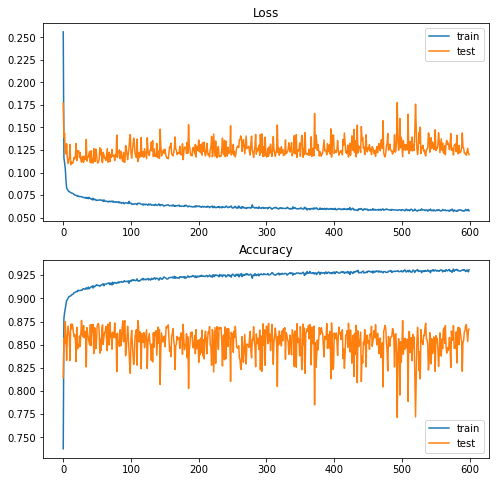

In [17]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = model8.evaluate(X_train, y_train, verbose=0)
_, test_acc = model8.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(8, 8))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# predict probabilities for test set
yhat_probs = model8.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model8.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.866821
Precision: 0.210287
Recall: 0.061423
F1 score: 0.095075
ROC AUC: 0.603361
[[17083   522]
 [ 2124   139]]
